In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import altair as alt
import seaborn as sns

In [3]:
df = pd.read_csv('vgsales.csv')
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


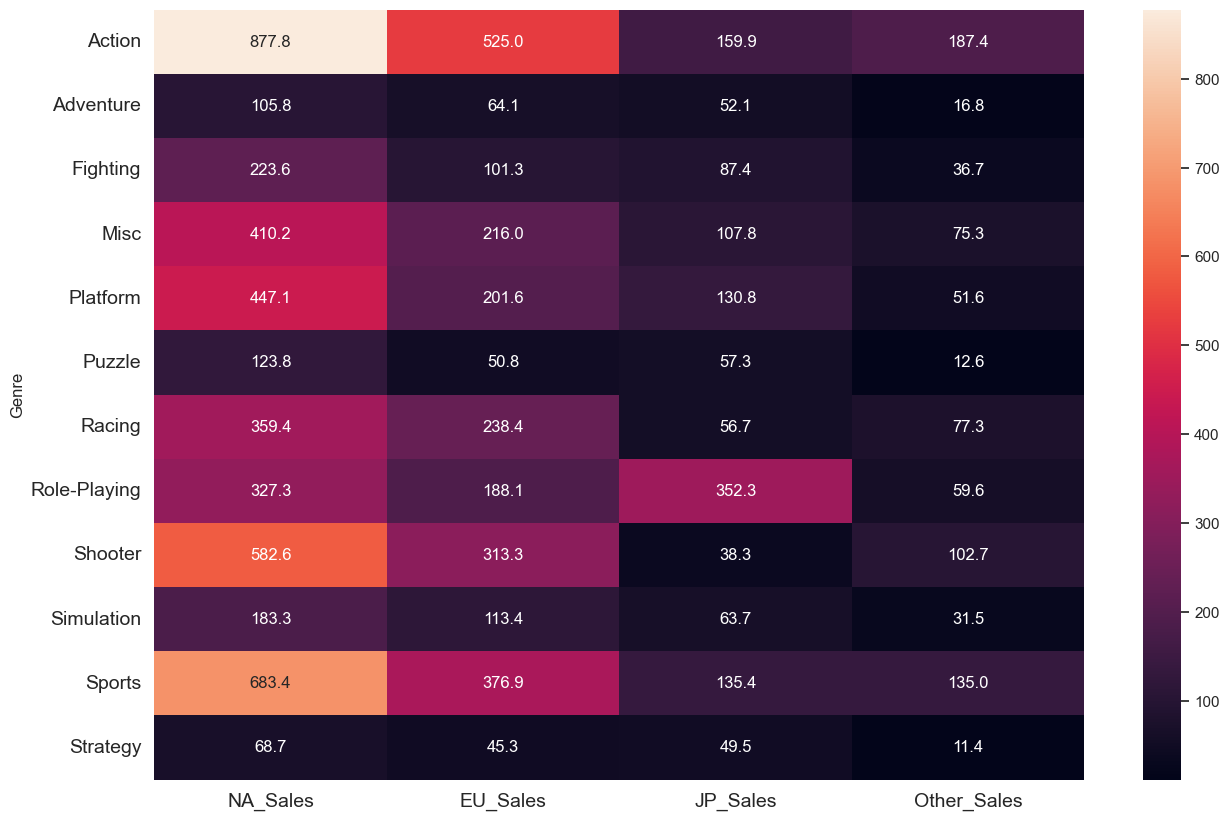

In [67]:
comp_genre = df[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]

comp_map = comp_genre.groupby(by=['Genre']).sum()
plt.figure(figsize=(15, 10))
sns.set(font_scale=1)
sns.heatmap(comp_map, annot=True, fmt = '.1f')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [55]:
df_melhores_jogos = df.sort_values(by='Global_Sales',ascending=False)
df_selecionado = df_melhores_jogos.iloc[0:10]
fig = px.bar(
    df_selecionado, 
    x='Name',  # Eixo X
    y='Global_Sales',    # Eixo Y
    title='Top 10 jogos mais venditos',
    text='Global_Sales'  # Exibir os valores nas barras
)

# Ajustando o layout
fig.update_traces(
    textposition='inside'  # Posição dos textos (valores)
)
fig.update_layout(
    xaxis_title='Jogo',
    yaxis_title='Unidades vendidas'
)

# Exibindo o gráfico
fig.show()

      


In [42]:
agrupado = df.groupby('Year', as_index=False)['Global_Sales'].sum()

fig = px.bar(
    agrupado, 
    x='Year',  # Eixo X
    y='Global_Sales',    # Eixo Y
    title='Soma de Valores por Ano',
    text='Global_Sales'  # Exibir os valores nas barras
)

# Ajustando o layout
fig.update_traces(
    textposition='outside'  # Posição dos textos (valores)
)
fig.update_layout(
    xaxis_title='Categoria',
    yaxis_title='Somatório de Valores'
)

# Exibindo o gráfico
fig.show()

In [13]:
df_vendas_pais = [df['NA_Sales'].sum(),df['EU_Sales'].sum(),df['JP_Sales'].sum()]
paises = ['NA','EU','JP']
fig = px.pie(
    names=paises,  
    values=df_vendas_pais,   
    title='Distribuição de Categorias', 
    
)
fig.update_traces(
    textinfo='percent+label',  # Mostra porcentagens e labels
    textfont=dict(color='white')  # Altera a cor do texto para branco
)
fig.show()